### Error Suppression
We can use "optimization_level" to suppress errors in primitives. Let us observe different optimization levels and their behaviour.

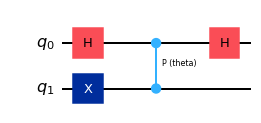

In [1]:
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit.quantum_info import SparsePauliOp

theta = Parameter("theta")
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cp(theta,0,1)
qc.h(0)

observables = SparsePauliOp.from_list([("ZZ", 1)])
qc.draw("mpl")

In [3]:
import numpy as np
phases = np.linspace(0, 2*np.pi, 50)
individual_phases = [[phase] for phase in phases]
print(individual_phases)

[[0.0], [0.1282282715750936], [0.2564565431501872], [0.38468481472528077], [0.5129130863003744], [0.6411413578754679], [0.7693696294505615], [0.8975979010256552], [1.0258261726007487], [1.1540544441758422], [1.2822827157509358], [1.4105109873260295], [1.538739258901123], [1.6669675304762166], [1.7951958020513104], [1.9234240736264039], [2.0516523452014974], [2.179880616776591], [2.3081088883516845], [2.436337159926778], [2.5645654315018716], [2.6927937030769655], [2.821021974652059], [2.9492502462271526], [3.077478517802246], [3.2057067893773397], [3.333935060952433], [3.4621633325275267], [3.5903916041026207], [3.7186198756777142], [3.8468481472528078], [3.9750764188279013], [4.103304690402995], [4.231532961978089], [4.359761233553182], [4.487989505128276], [4.616217776703369], [4.744446048278463], [4.872674319853556], [5.00090259142865], [5.129130863003743], [5.257359134578837], [5.385587406153931], [5.513815677729024], [5.642043949304118], [5.770272220879211], [5.898500492454305], [

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational = True,simulator = False)
backend_sim = AerSimulator.from_backend(backend)

In [8]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
estimator = Estimator(backend_sim)

circuit = qc

# No optimization
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend_sim, optimization_level=0)
isa_circuit = pm.run(circuit)
isa_observable = observables.apply_layout(layout=isa_circuit.layout)

noisy_exp_values = []
pub = (isa_circuit, isa_observable, [individual_phases])
cost = estimator.run([pub]).result()[0].data.evs
noisy_exp_values = cost[0]

In [9]:
# Optimization level 3
pm = generate_preset_pass_manager(backend=backend_sim, optimization_level=3)
isa_circuit = pm.run(circuit)
isa_observable = observables.apply_layout(layout=isa_circuit.layout)

noisy_exp_values_with_opt = []
pub = (isa_circuit, isa_observable, [individual_phases])
cost = estimator.run([pub]).result()[0].data.evs
noisy_exp_values_with_opt = cost[0]

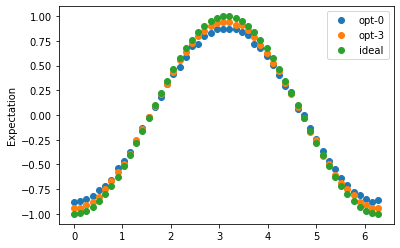

In [10]:
import matplotlib.pyplot as plt

plt.plot(phases, noisy_exp_values, "o", label = "opt-0")

plt.plot(phases, noisy_exp_values_with_opt, "o", label = "opt-3")

plt.plot(phases, 2 * np.sin(phases/2) **2 - 1, "o", label = "ideal")
plt.ylabel("Expectation")
plt.legend()
plt.show()